In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
plt.figure(figsize=(15,18))
import os
import sys

import seaborn as sns
%matplotlib inline
predict_dir_path = '/home/houruijie/traffic/traffic/data/predict_data/'
train_dir_path = '/home/houruijie/traffic/traffic/data/train/'

In [2]:
ls /home/houruijie/traffic/traffic/data

predict_data/  train/


## 0.1 拼接货量表、司机电话日志、司机量表

In [3]:
def concat_goods_counts():
    #将读取的第一个CSV文件写入合并后的文件保存
    file_list = os.listdir(train_dir_path + '货量表/')
    df = pd.read_csv(train_dir_path+ '货量表/' + file_list[0]) 
    df.to_csv(train_dir_path + 'goods_counts.csv',index=False)
    for i in range(1,len(file_list)):
        df = pd.read_csv(train_dir_path + '货量表/' + file_list[i])
        df.to_csv(train_dir_path + 'goods_counts.csv',index=False, header=False, mode='a+')
concat_goods_counts()

def concat_call_logs():
    #将读取的第一个CSV文件写入合并后的文件保存
    file_list = os.listdir(train_dir_path + '司机电话日志/')
    df = pd.read_csv(train_dir_path+ '司机电话日志/' + file_list[0]) 
    df.to_csv(train_dir_path + 'call_logs.csv',index=False)
    for i in range(1,len(file_list)):
        df = pd.read_csv(train_dir_path + '司机电话日志/' + file_list[i])
        df.to_csv(train_dir_path + 'call_logs.csv',index=False, header=False, mode='a+')
concat_call_logs()

def concat_driver_counts():
    #将读取的第一个CSV文件写入合并后的文件保存
    file_list = os.listdir(train_dir_path + '司机量表/')
    df = pd.read_csv(train_dir_path+ '司机量表/' + file_list[0]) 
    df.to_csv(train_dir_path + 'driver_counts.csv',index=False)
    for i in range(1,len(file_list)):
        df = pd.read_csv(train_dir_path + '司机量表/' + file_list[i])
        df.to_csv(train_dir_path + 'driver_counts.csv',index=False, header=False, mode='a+')
concat_driver_counts()

## 0.2 训练数据

In [4]:
# 司机画像
driver_portrait = pd.read_csv(train_dir_path + '司机画像.csv')
# 货主画像
shipper_portrait = pd.read_csv(train_dir_path+'货主画像.csv')
# 城市公路距离
city_way_distance = pd.read_csv(train_dir_path + '城市公路距离记录.csv')
# 城市天气记录
city_weather_history = pd.read_csv(train_dir_path + '城市天气记录.csv', encoding='gbk')
# 货量表
goodscounts = pd.read_csv(train_dir_path + 'goods_counts.csv')
# 司机电话日志
driver_call_logs = pd.read_csv(train_dir_path + 'call_logs.csv' )
# 司机量表
driver_counts = pd.read_csv(train_dir_path + 'driver_counts.csv')


In [11]:
driver_call_logs.city.value_counts()

320200    1000000
320500     881267
320100     580293
320600     516798
320800     511661
321000     273315
321300     243825
320700     237169
321100     237002
320300     228936
320400     217324
321200     214599
320900     209492
Name: city, dtype: int64

### 1.1 司机画像 数据
user_id：司机ID  
gender：性别  
age：年龄  
install_city_short：安装地(市)  
truck_age：车龄  
auth_success_days：认证通过时间  
truck_type：车型  
truck_len：车长  
truck_no_city_id：车牌号所在市编码  
以及一段时长内司机app端行为次数
例：
call_cnt_3：3天内司机打电话数量


In [16]:
# driver_portrait[['truck_no_city_id', 'install_city_short']]
driver_portrait[driver_portrait.truck_no_city_id == driver_portrait.install_city_short].shape

(266212, 29)

In [17]:
driver_portrait[driver_portrait.truck_no_city_id != driver_portrait.install_city_short].shape

(343010, 29)

In [11]:
print "driver protrait's shape: ", driver_portrait.shape

driver protrait's shape:  (609222, 29)


In [20]:
driver_portrait.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609222 entries, 0 to 609221
Data columns (total 29 columns):
user_id                609222 non-null int64
gender                 609222 non-null object
age                    578902 non-null float64
install_city_short     608748 non-null float64
auth_success_days      609222 non-null int64
truck_age              609222 non-null int64
truck_type             609222 non-null object
truck_len              609222 non-null float64
truck_no_city_id       607262 non-null float64
click_cargo_cnt_3      609222 non-null int64
click_cargo_cnt_7      609222 non-null int64
click_cargo_cnt_14     609222 non-null int64
click_cargo_cnt_30     609222 non-null int64
cargo_search_cnt_3     609222 non-null int64
cargo_search_cnt_7     609222 non-null int64
cargo_search_cnt_14    609222 non-null int64
cargo_search_cnt_30    609222 non-null int64
scan_cargo_cnt_3       609222 non-null int64
scan_cargo_cnt_7       609222 non-null int64
scan_cargo_cnt_14      6

In [12]:
driver_portrait.head(5)

,user_id,gender,age,install_city_short,auth_success_days,truck_age,truck_type,truck_len,truck_no_city_id,click_cargo_cnt_3,...,scan_cargo_cnt_14,scan_cargo_cnt_30,call_cargo_cnt_3,call_cargo_cnt_7,call_cargo_cnt_14,call_cargo_cnt_30,call_cnt_3,call_cnt_7,call_cnt_14,call_cnt_30
0,96436390464285200,男,42.0,330600.0,642,8,平板,6.8,330600.0,12,...,595,1659,0,1,3,9,0,1,5,13
1,96436390991015697,男,47.0,370300.0,534,3,平板,4.2,370100.0,15,...,5397,10616,0,8,23,42,0,8,26,48
2,15099575984499189,男,42.0,420800.0,205,3,平板,13.0,421000.0,0,...,2169,7005,0,0,0,8,0,0,0,11
3,96380588065137004,男,39.0,320200.0,366,1,高栏,9.6,130400.0,0,...,1080,2282,1,1,6,35,1,1,10,45
4,96436391885931594,男,47.0,420100.0,261,1,高栏,13.0,411400.0,52,...,3170,5502,5,5,5,6,8,8,8,9


In [13]:
driver_portrait.describe()

,user_id,age,install_city_short,auth_success_days,truck_age,truck_len,truck_no_city_id,click_cargo_cnt_3,click_cargo_cnt_7,click_cargo_cnt_14,...,scan_cargo_cnt_14,scan_cargo_cnt_30,call_cargo_cnt_3,call_cargo_cnt_7,call_cargo_cnt_14,call_cargo_cnt_30,call_cnt_3,call_cnt_7,call_cnt_14,call_cnt_30
count,6.092220e+05,578902.000000,608748.000000,609222.000000,609222.000000,6.092220e+05,607262.000000,609222.000000,609222.000000,609222.000000,...,609222.000000,609222.000000,609222.000000,609222.000000,609222.000000,609222.000000,609222.000000,609222.000000,609222.000000,609222.000000
mean,1.818277e+17,38.872013,346778.019890,378.248666,3.550138,7.180363e+01,331954.045898,28.525639,62.778884,126.921531,...,2907.487801,6135.409522,5.818273,12.650581,25.554607,54.630184,8.911983,19.274281,39.018891,83.186466
std,2.018977e+17,7.557993,95435.907235,209.764389,2.751602,3.319303e+04,96002.539768,56.627347,110.863918,209.702960,...,3478.383966,6924.449906,10.159952,18.278484,32.826927,63.249153,17.298373,30.471889,54.454258,103.995989
min,3.700000e+01,2.000000,110100.000000,0.000000,-1.000000,0.000000e+00,110100.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,6.000000
25%,9.626819e+16,33.000000,320500.000000,194.000000,1.000000,6.800000e+00,320300.000000,1.000000,5.000000,16.000000,...,685.000000,1685.000000,0.000000,1.000000,5.250000,14.000000,0.000000,2.000000,7.000000,19.000000
50%,9.643639e+16,39.000000,341200.000000,394.000000,3.000000,9.600000e+00,341300.000000,8.000000,23.000000,53.000000,...,1751.000000,3846.000000,2.000000,6.000000,14.000000,32.000000,2.000000,8.000000,19.000000,46.000000
75%,9.643639e+16,44.000000,410100.000000,640.000000,5.000000,1.300000e+01,371400.000000,31.000000,72.000000,149.000000,...,3843.000000,8056.000000,7.000000,17.000000,33.000000,71.000000,10.000000,24.000000,50.000000,106.000000
max,3.988217e+18,90.000000,659004.000000,642.000000,18.000000,2.221339e+07,659001.000000,3710.000000,4151.000000,8728.000000,...,77946.000000,154361.000000,536.000000,950.000000,1743.000000,2946.000000,619.000000,1070.000000,2032.000000,3505.000000


In [14]:
# 偏度
driver_portrait.kurt()

user_id                     0.726219
age                        -0.461992
install_city_short          2.015523
auth_success_days          -1.313041
truck_age                   0.065995
truck_len              371579.867829
truck_no_city_id            1.461186
click_cargo_cnt_3          85.179750
click_cargo_cnt_7          47.839355
click_cargo_cnt_14         47.783389
click_cargo_cnt_30         43.760442
cargo_search_cnt_3       1249.121241
cargo_search_cnt_7        752.219737
cargo_search_cnt_14       989.544695
cargo_search_cnt_30       677.963792
scan_cargo_cnt_3           23.553835
scan_cargo_cnt_7           17.420703
scan_cargo_cnt_14          15.965732
scan_cargo_cnt_30          15.004535
call_cargo_cnt_3           37.678835
call_cargo_cnt_7           31.618083
call_cargo_cnt_14          31.414390
call_cargo_cnt_30          25.357351
call_cnt_3                 41.172684
call_cnt_7                 28.785715
call_cnt_14                27.445729
call_cnt_30                24.180182
d

### 1.2 货主画像
shipper_id：货主ID  
cargo_msg_cnt_all：发货数量  
deal_cnt_all：已定货量  
pay_cnt_all：已成交货量  
gender：性别  
age：年龄  
auth_success_days：认证通过时间

In [16]:
shipper_portrait.shape

(90310, 7)

In [19]:
shipper_portrait.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90310 entries, 0 to 90309
Data columns (total 7 columns):
shipper_id           90310 non-null int64
cargo_msg_cnt_all    90310 non-null int64
deal_cnt_all         90310 non-null int64
pay_cnt_all          90310 non-null int64
gender               90310 non-null object
age                  86853 non-null float64
auth_success_days    90310 non-null int64
dtypes: float64(1), int64(5), object(1)
memory usage: 4.8+ MB


In [17]:
shipper_portrait.head(5)

,shipper_id,cargo_msg_cnt_all,deal_cnt_all,pay_cnt_all,gender,age,auth_success_days
0,478,11974,1664,1522,女,48.0,642
1,14863640208623454,286,3,2,男,28.0,478
2,15090713935812634,24,3,1,男,41.0,208
3,15095490963328972,9,1,1,男,32.0,22
4,15096852391828835,889,228,208,女,30.0,208


In [18]:
shipper_portrait.describe()

,shipper_id,cargo_msg_cnt_all,deal_cnt_all,pay_cnt_all,age,auth_success_days
count,9.031000e+04,90310.000000,90310.000000,90310.000000,86853.000000,90310.000000
mean,2.486366e+17,1809.018702,255.438235,178.086059,38.926796,404.533717
std,5.704818e+17,3959.725030,514.473580,326.216584,9.027084,213.210206
min,7.000000e+00,1.000000,0.000000,0.000000,2.000000,0.000000
25%,9.619873e+16,115.250000,19.000000,14.000000,32.000000,216.000000
50%,9.643639e+16,478.000000,80.000000,59.000000,39.000000,415.000000
75%,9.643639e+16,1708.000000,265.000000,193.000000,45.000000,642.000000
max,3.988217e+18,144368.000000,25671.000000,5696.000000,89.000000,642.000000


In [21]:
shipper_portrait.kurt()

shipper_id            34.487616
cargo_msg_cnt_all     98.444259
deal_cnt_all         112.918402
pay_cnt_all           28.882974
age                   -0.180999
auth_success_days     -1.298626
dtype: float64

### 1.3 城市公路距离记录
记录了不同城市之间的距离  
记录了120个start_city到3244个end_city的距离

In [27]:
city_way_distance.shape

(389280, 3)

In [30]:
print "the numbers of start_city: ", city_way_distance.start_city_id.unique().shape
print "the numbers of end_city: ", city_way_distance.end_city_id.unique().shape

the numbers of start_city:  (120,)
the numbers of end_city:  (3244,)


In [23]:
city_way_distance.tail(5)

,start_city_id,end_city_id,distance
389275,321324,710100,1102.0
389276,321324,810000,1295.0
389277,321324,810100,1295.0
389278,321324,820000,1337.0
389279,321324,820100,1337.0


### 1.4 城市天气记录
name：城市名字  
code：城市代号  
data：日期  
weather：天气情况  
temperature：温度  
wind：风力

In [35]:
city_weather_history.shape

(9977, 6)

In [39]:
print "the number of city: ", city_weather_history.name.unique().shape[0]
print "the number of data: ", city_weather_history.date.unique().shape[0]
print "记录了66个城市 151天的"

the number of city:  66
the number of data:  151


In [111]:
city_weather_history.head(5)

,name,code,date,weather,temperature,wind
0,宝应,321023,2018-01-01,多云/多云,11/3,东风34级/东南风45级
1,宝应,321023,2018-01-02,多云/多云,11/3,东风34级/东南风45级
2,宝应,321023,2018-01-03,阴/小雨,10/3,东风34级/东北风45级
3,宝应,321023,2018-01-04,小雨/中雪,4/0,东北风45级/东北风45级
4,宝应,321023,2018-01-05,大雪/小雪,1/5,东北风45级/东北风45级


In [40]:
city_weather_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9977 entries, 0 to 9976
Data columns (total 6 columns):
name           9977 non-null object
code           9977 non-null int64
date           9977 non-null object
weather        9977 non-null object
temperature    9977 non-null object
wind           9977 non-null object
dtypes: int64(1), object(5)
memory usage: 467.7+ KB


### 1.5货量表

In [42]:
goodscounts.head(5)

,city,day,count
0,320700,20180101,196
1,320700,20180102,411
2,320700,20180103,470
3,320700,20180104,345
4,320700,20180105,404


In [45]:
print "the number of city: ", goodscounts.city.unique().shape
print "the number of day: ", goodscounts.day.unique().shape

the number of city:  (13,)
the number of day:  (150,)


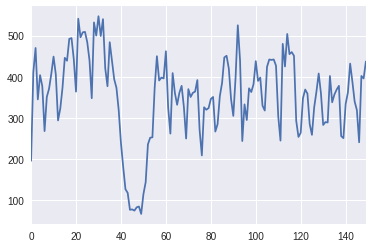

In [47]:
# 单个城市的货量
goodscounts[goodscounts.city==320700]['count'].plot()

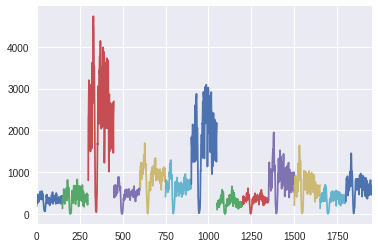

In [48]:
# 不同城市的货量
for city_code in goodscounts.city.unique():
    goodscounts[goodscounts.city==city_code]['count'].plot()

### 1.6 司机电话日志

In [49]:
driver_call_logs.shape

(5351681, 4)

In [50]:
driver_call_logs.head(5)

,city,day,user_id,id
0,320700,20180316,23429835901096698,376169218
1,320700,20180228,96436391333622425,367207192
2,320700,20180228,96315273736851793,367207192
3,320700,20180228,600608457530817539,366767097
4,320700,20180228,96436390483266858,367143564


In [53]:
print "the number of city: ", driver_call_logs.city.unique().shape[0]
print "the number of day: ", driver_call_logs.day.unique().shape[0]
print "the number of driver_id: ", driver_call_logs.user_id.unique().shape[0]

the number of city:  13
the number of day:  150
the number of driver_id:  444808


In [58]:
print "打电话频率最高的10个id"
print driver_call_logs.user_id.value_counts()[:10]

打电话频率最高的10个id
96436391096797856     553
96436391768425670     494
23429835901324282     474
600608457467290666    467
96436391874743102     439
23651742485631314     437
600608457463081445    431
96436390882828428     416
96268191751291633     413
96436391111299310     410
Name: user_id, dtype: int64


### 1.7 司机量表

In [59]:
driver_counts.shape

(1899, 3)

In [62]:
driver_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899 entries, 0 to 1898
Data columns (total 3 columns):
city                 1899 non-null int64
day                  1899 non-null int64
driver_call_count    1899 non-null int64
dtypes: int64(3)
memory usage: 44.6 KB


In [61]:
print "the number of city: ", driver_counts.city.unique().shape[0]
print "the number of day: ", driver_counts.day.unique().shape[0]

the number of city:  13
the number of day:  150


In [60]:
driver_counts.head(5)

,city,day,driver_call_count
0,320700,20180101,438
1,320700,20180102,1120
2,320700,20180103,1100
3,320700,20180104,564
4,320700,20180105,669


## 预测数据
这个预测数据只有weather是有用的，题目所用的提交样式在https://github.com/Kesci/nanjing_AI_competition_2018/blob/master/files/02_submission_template.csv

In [63]:
predict = pd.read_csv(predict_dir_path + 'predict.csv', header=None)
weather = pd.read_csv(predict_dir_path + '天气数据.csv', encoding='gbk')
predict_sample = pd.read_csv(predict_dir_path + 'predict_sample.csv', header=None)

In [70]:
weather.head(5)

,name,code,date,weather,temperature,wind
0,宝应,321023,2018/6/1,晴/晴,29/17,东风3级/东风3级
1,宝应,321023,2018/6/2,多云/多云,29/16,东风3级/东风3级
2,宝应,321023,2018/6/3,多云/多云,29/19,东风3级/东风3级
3,宝应,321023,2018/6/4,阴/多云,29/21,东北风12级/东北风12级
4,宝应,321023,2018/6/5,多云/晴,32/21,西南风12级/西南风12级


In [68]:
weather.shape

(462, 6)

In [69]:
weather.date.unique()

array([u'2018/6/1', u'2018/6/2', u'2018/6/3', u'2018/6/4', u'2018/6/5',
       u'2018/6/6', u'2018/6/7'], dtype=object)

In [62]:
print "the number of weather: ", weather.weather.unique().shape
print "the number of wind: ", weather.wind.unique().shape

(20,)